In [ ]:
import plotly.express as px

# Zadanie 1 (VEGA - język interaktywnych wizualizacji)

Używając pakietu “Vega-Altair”:
- zilustruj interakcje między prestiżem, zarobkami, edukacją różnych zawodów, używając danych z badania  “Duncan, O. D. (1961) A socioeconomic index for all occupations”
- odpowiedz na pytanie: która profesja cieszy się wysokim prestiżem pomimo niskich zarobków? 🙂


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import altair as alt

data = sm.datasets.get_rdataset("Duncan", "carData", cache=True).data # using statsmodels, load data from the R collection
data = data.reset_index()
alt.Chart(data).mark_circle().encode(
   alt.X(alt.repeat("row"), type='quantitative'),
   alt.Y(alt.repeat("column"), type='quantitative'),
   color='type',# color by job type
   tooltip='rownames' # show job name on hover
).properties(
   width=150,
   height=150
).repeat(
   row=['income', 'education', 'prestige'], # income, education, prestige,
   column=['income', 'education', 'prestige']# income, education, prestige,
).interactive()

alt.RepeatChart(...)

In [ ]:
# Minister!

In [ ]:
data

,rownames,type,income,education,prestige
0,accountant,prof,62,86,82
1,pilot,prof,72,76,83
2,architect,prof,75,92,90
3,author,prof,55,90,76
4,chemist,prof,64,86,90
5,minister,prof,21,84,87
6,professor,prof,64,93,93
7,dentist,prof,80,100,90
8,reporter,wc,67,87,52
9,engineer,prof,72,86,88


# Zadanie 2 (Związek prestiżu, edukacji i zarobków)
Używając danych z badania “Duncan, O. D. (1961) A socioeconomic index for all occupations”:
- zbuduj model objaśniający prestiż przez zarobki, edukację i rodzaj pracy (“niebieskie kołnierzyki”, “białe kołnierzyki itp).
- używając istotności współczynników (P>|t|), oceń dla których zawodach widać najmocniejszy wpływ edukacji na prestiż?


In [1]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# fit a model
prestige = sm.datasets.get_rdataset("Duncan", "carData", cache=True).data
model1 = ols("prestige ~ income + education:C(type)", data=prestige).fit() # NOTE: make the education coefficient depend on job type
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     91.41
Date:                Sun, 05 May 2024   Prob (F-statistic):           1.44e-19
Time:                        09:09:08   Log-Likelihood:                -166.49
No. Observations:                  45   AIC:                             343.0
Df Residuals:                      40   BIC:                             352.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.1078      6.013     -0.018      0.986     -12.260      12.044
income                      0.5908      0.093      6.336      0.000       0.402       0.779
education:C(type)[bc]       0.3622      0.228      1.588      0.120      -0.099       0.823
education:C(type)[prof]     0.5431      0.091      5.987      0.000       0.360       0.726
education:C(type)[wc]       0.1356      0.121      1.123      0.268      -0.108       0.380
==============================================================================
Omnibus:                        9.276   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                8.484
Skew:                           0.997   Prob(JB):                       0.0144
Kurtosis:                       3.740   Cond. No.                         263.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# ODP: Najmocniejszy i statystycznie istotny wpływ widać dla zawodów profesjonalnych.

# Zadanie 3 (Diagnostyka i naprawa regresji)
Dla reszt modelu z poprzedniego zadania:
- czy reszty regresji mają rozkład normalny (wskazówka: <summary> raportuje test Jarque-Bera)
- narysuj wykres typu QQ dla reszt regresji; oczekiwany wynik to

- zidentyfikuj anomalię w prawym górnym rogu, któremu zawodowi odpowiada? (wskazówka: popatrz na wysokie wartości model1.resid ) 🙂
- dopasuj model ponownie usuwając anomalię z danych. jak wygląda teraz wynik testu Jarque-Bera?


In [ ]:
fig = px.scatter(x = model1.fittedvalues, y = model1.resid, labels={'x': 'Fitted Values', 'y': 'Residuals'},
                 title='Residuals vs Fitted Values')
fig.show()

In [ ]:
# Nie, reszty nie mają rozkładu normalnego
# wynik Jarque-Bera (p=0.0144) pozwala odrzucić hipotezę o normalności rokładu (na poziomie 5%)

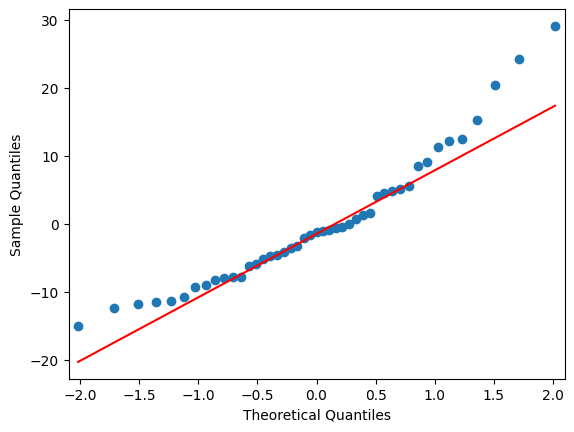

In [ ]:
fig = sm.qqplot(model1.resid, line='q')
fig.show()

In [ ]:
# Ekstremalny wynik to zawód minister

In [ ]:
# fit a model
prestige = sm.datasets.get_rdataset("Duncan", "carData", cache=True).data
mask = ~prestige.index.isin(["minister"])
model2 = ols("prestige ~ income + education:C(type)", data=prestige[mask]).fit() # NOTE: make the education coefficient depend on job type
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     115.8
Date:                Fri, 12 Apr 2024   Prob (F-statistic):           4.31e-21
Time:                        20:38:22   Log-Likelihood:                -157.21
No. Observations:                  44   AIC:                             324.4
Df Residuals:                      39   BIC:                             333.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -1.9384      5.330     -0.364      0.718     -12.719       8.842
income                      0.7061      0.089      7.975      0.000       0.527       0.885
education:C(type)[bc]       0.3199      0.202      1.587      0.121      -0.088       0.728
education:C(type)[prof]     0.4569      0.084      5.460      0.000       0.288       0.626
education:C(type)[wc]       0.0760      0.108      0.705      0.485      -0.142       0.294
==============================================================================
Omnibus:                        3.775   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                2.734
Skew:                           0.583   Prob(JB):                        0.255
Kurtosis:                       3.365   Cond. No.                         261.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Na podstawie tego wyniku Jarque-Bera nie możemy odrzucić hipotezy o normalności rozkładu